# Preprocessing Workflow


🎯 This exercise will guide you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

🌤 We stored the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) in the cloud.

👇 Run the code down below to load the dataset and features you will be working with.

In [195]:
import pandas as pd
import numpy as np

# Loading the dataset
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr',
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']

# Overwriting the "data" variable to keep only the columns of interest
# Notice the .copy() to copy the values
data = data[selected_features].copy()

# Showing the first five rows
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


📚 Take the time to do a ***preliminary investigation*** of the features by reading the ***dataset description*** available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## (1) Duplicates

ℹ️ ***Duplicates in datasets cause data leakage.*** 

👉 It is important to locate and remove duplicates.

❓ How many duplicated rows are there in the dataset ❓

<i>Save your answer under variable name `duplicate_count`.</i>

In [196]:
duplicate_count = data.duplicated().sum()

❓ Remove the duplicates from the dataset. Overwite the dataframe `data`❓

In [197]:
data = data.drop_duplicates()

🧪 **Test your code**

In [198]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/aheggs/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/aheggs/code/andyheggs/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_duplicates.py::TestDuplicates::test_dataset_length PASSED           [ 50%]
test_duplicates.py::TestDuplicates::test_duplicate_count PASSED          [100%]

============================== 2 passed in 12.47s ==============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master



In [199]:
!git add tests/duplicates.pickle

!git commit -m 'Completed duplicates step'

!git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Preprocessing-Workflow.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	tests/encoding.pickle

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## (2) Missing data

❓ Print the percentage of missing values for every column of the dataframe. ❓

In [200]:
data.isnull().sum().sort_values(ascending=False) / len(data)

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

### `GarageFinish`

❓ **Questions** about `GarageFinish` ❓

Investigate the missing values in `GarageFinish`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using `SimpleImputer` from Scikit-Learn
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [201]:
(data.GarageFinish.isnull().sum() / len(data))

0.05547945205479452

In [202]:
data.GarageFinish = data.GarageFinish.replace(np.nan, 'NoGarage')
data.GarageFinish.value_counts()

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

### `RoofSurface`

❓ **Questions** about `RoofSurface` ❓

Investigate the missing values in `RoofSurface`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using sklearn's `SimpleImputer`
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [203]:
(data.RoofSurface.isnull().sum() / len(data))

data['RoofSurface'] = data['RoofSurface'].replace('NoFireplace', np.nan)
print(data['RoofSurface'].dtype)
# data.RoofSurface = data.RoofSurface.replace(np.nan, 'NoFireplace')
data['RoofSurface'] = data['RoofSurface'].replace(np.nan, data['RoofSurface'].median())


float64


### `ChimneyStyle`

❓ **Questions** about `ChimneyStyle` ❓

Investigate the missing values in `ChimneyStyle`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
* ⚠️ Be careful: not all missing values are represented as `np.nans`, and Python's `isnull()` only detects `np.nans`...
    
* ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
    

</details>

In [204]:
(data.ChimneyStyle.isnull().sum() / len(data))
data = data.drop(columns=['ChimneyStyle'])
data.head()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500
1,1262,3,1,8,874.0,RFn,Y,5,181500
2,1786,3,1,5,1593.0,RFn,Y,9,223500
3,1717,3,1,5,2566.0,Unf,Y,2,140000
4,2198,4,1,5,3130.0,RFn,Y,12,250000


🧪 **Test your code**

In [205]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/aheggs/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/aheggs/code/andyheggs/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_nans PASSED             [ 50%]
test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 4.96s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



In [206]:
!git add tests/missing_values.pickle

!git commit -m 'Completed missing_values step'

!git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Preprocessing-Workflow.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	tests/encoding.pickle

no changes added to commit (use "git add" and/or "git commit -a")


Everything up-to-date


❓ When you are done with handling missing value, print out the percentage of missing values for the entire dataframe ❓

You should no longer have missing values !

In [207]:
data.isnull().sum().sort_values(ascending=False) / len(data)

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

## (3) Scaling

**First of all, before scaling...**

To understand the effects of scaling and encoding on model performance, let's get a **base score without any data transformation**.

❓ Cross-validate a linear regression model that predicts `SalePrice` using the other features ❓

⚠️ Note that a linear regression model can only handle numeric features. [DataFrame.select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) can help.

In [208]:
data_numeric = data.select_dtypes(include=[np.number])
data_numeric

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = data_numeric.drop(columns=["SalePrice"])  # all numeric features except the target
y = data_numeric["SalePrice"]                 # the target

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring="r2")  # or use another metric
print("Mean R2:", scores.mean())


Mean R2: 0.5726603017210607


Keep this score in mind! You will train a new model after data preprocessing in Challenge #2 - see if it improves your average score 😉

🚀 Now, back to **feature scaling**!

###  `RoofSurface` 

❓ **Question** about `RoofSurface` ❓

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

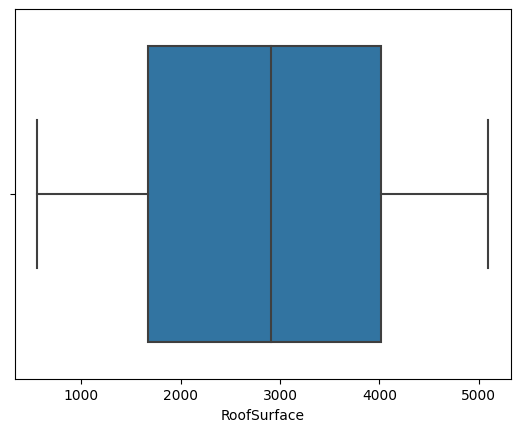

In [209]:
import seaborn as sns
#sns.histplot(data['RoofSurface'], bins =200,kde=True);
sns.boxplot(data=data, x='RoofSurface');

<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ Since `RoofSurface` has neither a Gaussian distribution, nor outliers $\rightarrow$ MinMaxScaler.
</details>

### `GrLivArea`

❓ **Question** about `GrLivArea` ❓

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

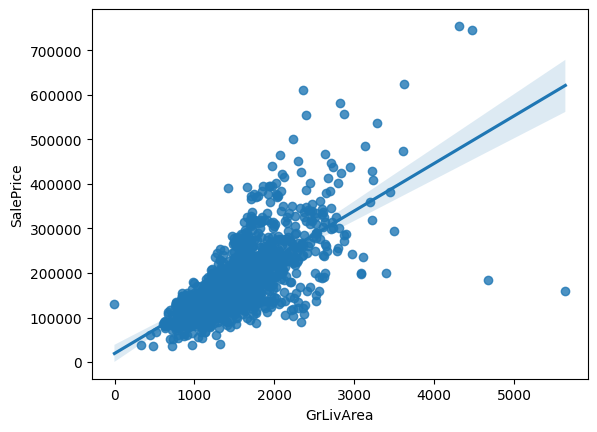

In [210]:
import seaborn as sns
# sns.histplot(data['GrLivArea'], bins =200,kde=True);
# sns.boxplot(data=data, x='GrLivArea');
sns.regplot(data=data, x='GrLivArea', y='SalePrice');

<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `GrLivArea` has many outliers $\rightarrow$ RobustScaler()
</details>

### `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

❓ **Questions** about `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr` ❓

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scaler
2. Standard Scaler
3. Robust Scaler

Replace the original columns with the transformed values.

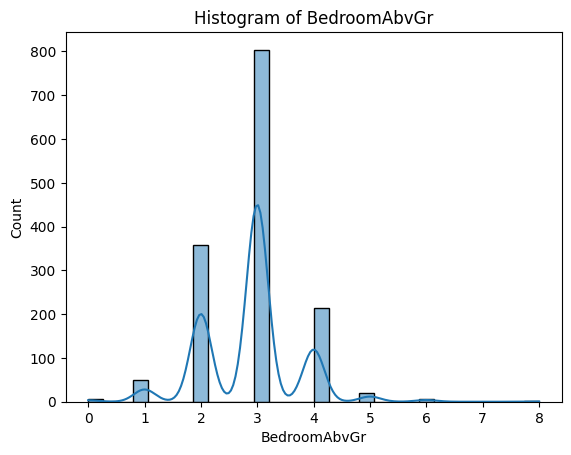

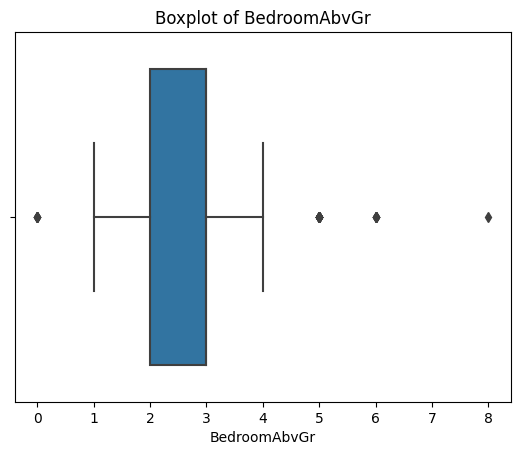

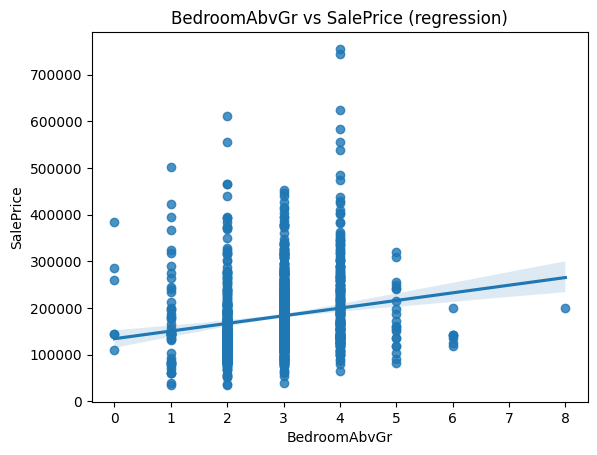

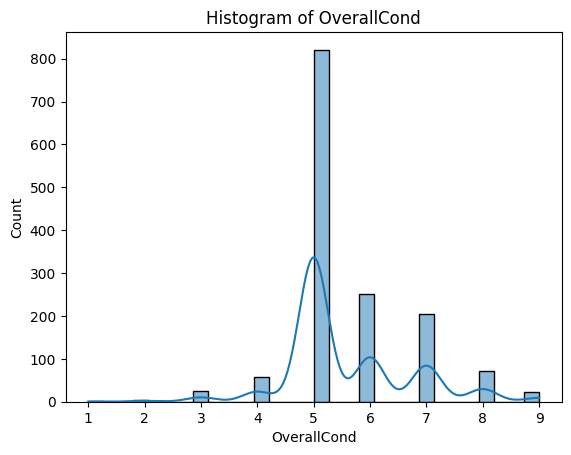

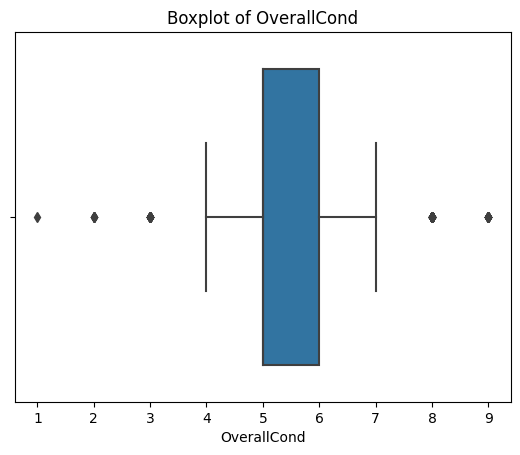

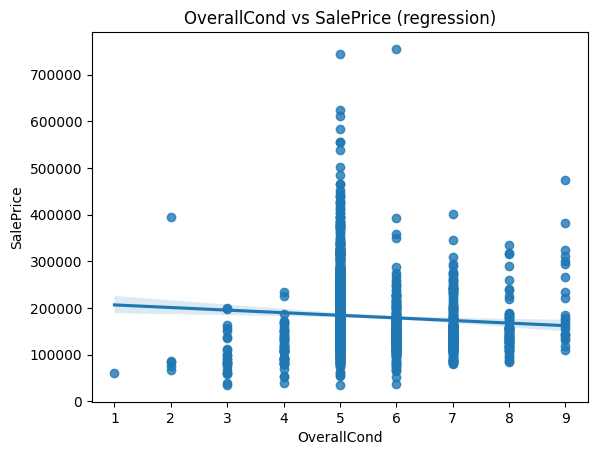

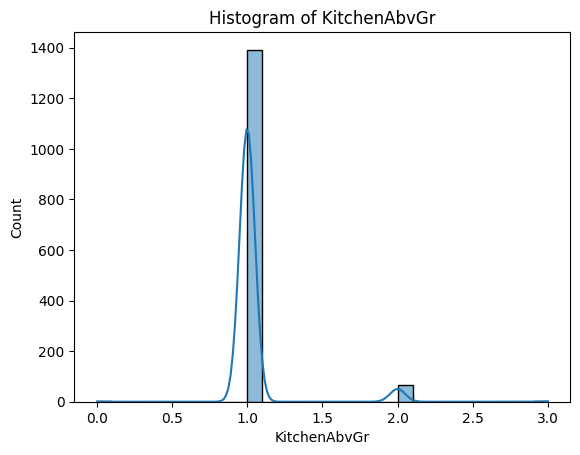

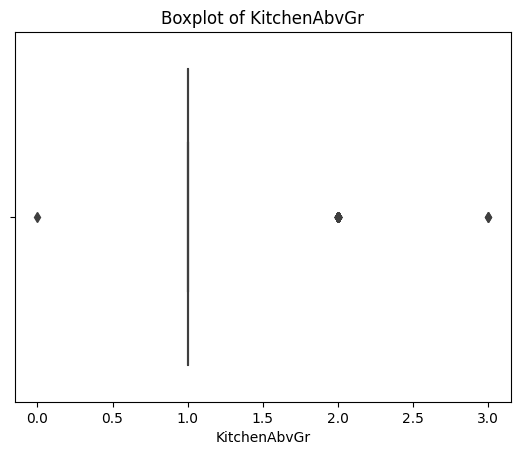

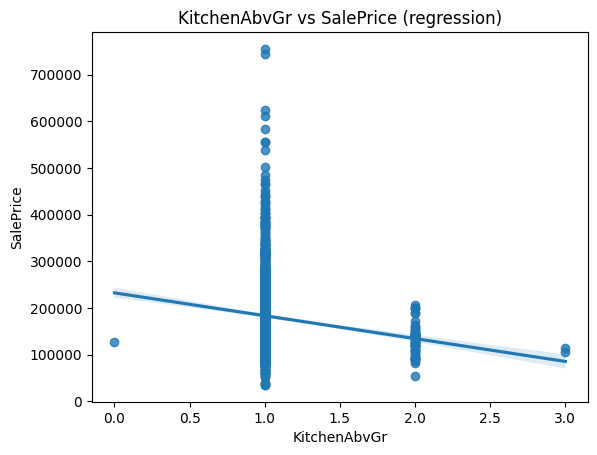

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- BedroomAbvGr ---

# Histogram
sns.histplot(data['BedroomAbvGr'], bins=30, kde=True)
plt.title('Histogram of BedroomAbvGr')
plt.show()

# Boxplot
sns.boxplot(data=data, x='BedroomAbvGr')
plt.title('Boxplot of BedroomAbvGr')
plt.show()

# Scatter + regression line
sns.regplot(data=data, x='BedroomAbvGr', y='SalePrice')
plt.title('BedroomAbvGr vs SalePrice (regression)')
plt.show()

# --- OverallCond ---

sns.histplot(data['OverallCond'], bins=30, kde=True)
plt.title('Histogram of OverallCond')
plt.show()

sns.boxplot(data=data, x='OverallCond')
plt.title('Boxplot of OverallCond')
plt.show()

sns.regplot(data=data, x='OverallCond', y='SalePrice')
plt.title('OverallCond vs SalePrice (regression)')
plt.show()

# --- KitchenAbvGr ---

sns.histplot(data['KitchenAbvGr'], bins=30, kde=True)
plt.title('Histogram of KitchenAbvGr')
plt.show()

sns.boxplot(data=data, x='KitchenAbvGr')
plt.title('Boxplot of KitchenAbvGr')
plt.show()

sns.regplot(data=data, x='KitchenAbvGr', y='SalePrice')
plt.title('KitchenAbvGr vs SalePrice (regression)')
plt.show()


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features. There are less than 0.1% of outliers so no need to use _RobustScaler()_. The distribution is not Gaussian, hence no _StandardScaler()_. By elimination, you can confidently choose _MinMaxScaler()_.
</details>

In [212]:
data.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1514.750685,2.866438,1.046575,5.575342,2863.467123,6.321918,180921.195890
std,526.830494,0.815778,0.220338,1.112799,1322.912394,2.703626,79442.502883
min,-1.000000,0.000000,0.000000,1.000000,558.000000,1.000000,34900.000000
25%,1129.500000,2.000000,1.000000,5.000000,1674.750000,5.000000,129975.000000
50%,1464.000000,3.000000,1.000000,5.000000,2906.000000,6.000000,163000.000000
75%,1776.750000,3.000000,1.000000,6.000000,4012.500000,8.000000,214000.000000
max,5642.000000,8.000000,3.000000,9.000000,5095.000000,12.000000,755000.000000


In [213]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# List the columns you want to scale
cols_to_scale = ['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']

# Fit the scaler on those columns (and transform them)
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])


In [214]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
data['GrLivArea'] = rob_scaler.fit_transform(data[['GrLivArea']])

In [215]:
roof_scaler = MinMaxScaler()
data['RoofSurface'] = roof_scaler.fit_transform(data[['RoofSurface']])

🧪 **Test your code**

In [216]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/aheggs/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/aheggs/code/andyheggs/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 3 items

test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED      [ 33%]
test_scaling.py::TestScaling::test_gr_liv_area PASSED                    [ 66%]
test_scaling.py::TestScaling::test_roof_surface PASSED                   [100%]

============================== 3 passed in 3.07s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



In [217]:
!git add tests/scaling.pickle

!git commit -m 'Completed scaling step'

!git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Preprocessing-Workflow.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	tests/encoding.pickle

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## (4) Feature Encoding

### `GarageFinish`

❓ **Question** about `GarageFinish`❓

👇 Investigate `GarageFinish` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 <i>Hint</i></summary>
        
ℹ️ `GarageFinish` is a multicategorical feature that should be One-hot-encoded. You could also consider an Ordinal Encoding but we would have to know for sure that Unfinished or no garage are definitely worse that rough finished!
</details>

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# # 1. Instantiate and fit
# CentralAir_ohe = OneHotEncoder(sparse_output=False)
# CentralAir_ohe.fit(data[['GarageFinish']])

# # 2. Transform and build a DataFrame
# garagefinish_encoded = CentralAir_ohe.transform(data[['GarageFinish']])
# garagefinish_cols = CentralAir_ohe.get_feature_names_out(['GarageFinish'])
# garagefinish_df = pd.DataFrame(garagefinish_encoded,
#                                columns=garagefinish_cols,
#                                index=data.index)

# # 3. Concatenate the new DataFrame with the original
# data = pd.concat([data, garagefinish_df], axis=1)

# # 4. Drop the original column
# data.drop(columns=['GarageFinish'], inplace=True)

# data.head()


Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'SalePrice', 'GarageFinish_Fin', 'GarageFinish_NoGarage',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'CentralAir_N', 'CentralAir_Y',
       'sin_MoSold', 'cos_MoSold'],
      dtype='object')


In [ ]:
CentralAir_ohe.get_feature_names_out(['CentralAir'])

array(['GarageFinish_Fin', 'GarageFinish_NoGarage', 'GarageFinish_RFn',
       'GarageFinish_Unf'], dtype=object)

### Encoding  `CentralAir`

❓ **Question** about `CentralAir`❓

Investigate `CentralAir` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column with the newly generated encoded columns.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Instantiate and fit
CentralAir_ohe = OneHotEncoder(sparse_output=False)
CentralAir_ohe.fit(data[['CentralAir']])

# 2. Transform and build a DataFrame
CentralAir_encoded = CentralAir_ohe.transform(data[['CentralAir']])
CentralAir_cols = CentralAir_ohe.get_feature_names_out(['CentralAir'])
CentralAir_df = pd.DataFrame(CentralAir_encoded,
                               columns=CentralAir_cols,
                               index=data.index)

# 3. Concatenate the new DataFrame with the original
data = pd.concat([data, CentralAir_df], axis=1)

# 4. Drop the original column
data.drop(columns=['CentralAir'], inplace=True)

data.head()

KeyError: "None of [Index(['CentralAir'], dtype='object')] are in the [columns]"

## (5) Feature Engineering

### `MoSold` - Cyclical engineering 

👨🏻‍🏫 A feature can be numerical (continuous or discrete), categorical or ordinal. But a feature can also be temporal (e.g. quarters, months, days, minutes, ...). 

Cyclical features like time need some specific preprocessing. Indeed, if you want any Machine Learning algorithm to capture this cyclicity, your cyclical features must be preprocessed in a certain way.

👉 Consider the feature `MoSold`, the month on which the house was sold.

In [232]:
import numpy as np
# 1. Create sine and cosine columns
if 'MoSold' in data.columns:
    data['sin_MoSold'] = np.sin(2 * np.pi * data['MoSold'] / 12)
    data['cos_MoSold'] = np.cos(2 * np.pi * data['MoSold'] / 12)
    data.drop(columns=['MoSold'], inplace=True)
else:
    print("Warning: 'MoSold' column not found. Ensure previous steps retain it until transformation.")

* Many houses were sold in June (6), July (7) and May (5) (Spring/Summer)
* Only a few houses were sold in December (12), January (1) and February (2) (~ Fall/Winter)
    * But for any Machine Learning model, there is no reason why December (12) and January (1) would be "close"...

👩🏻‍🏫 ***How to deal with cyclical features?***

1.  Look at the following illustration and read the explanations to distinguish two different months.

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cyclical_feature_engineering.png" alt="Cyclical features" width="1000">


2. Read this [article](https://ianlondon.github.io/posts/encoding-cyclical-features-24-hour-time/) for more details.




❓ **Question** about `MoSold` ❓ 
- Create two new features `sin_MoSold` and `cos_MoSold` which correspond respectively to the sine and cosine of MoSold.
- Drop the original column `MoSold`

<details>
    <summary>💡 <i>Hint</i></summary>
    
To create a time engineered feature based on a column which gives the second in the day!
```python
seconds_in_day = 24*60*60

df['sin_time'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_in_day)
df.drop(columns=['seconds'], inplace=True)

df.head()
```


</details>

In [233]:
import numpy as np
# 1. Create sine and cosine columns
if 'MoSold' in data.columns:
    data['sin_MoSold'] = np.sin(2 * np.pi * data['MoSold'] / 12)
    data['cos_MoSold'] = np.cos(2 * np.pi * data['MoSold'] / 12)
    data.drop(columns=['MoSold'], inplace=True)
else:
    print("Warning: 'MoSold' column not found. Ensure previous steps retain it until transformation.")

🧪 **Test your code**

In [234]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/aheggs/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/aheggs/code/andyheggs/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_central_air FAILED                  [ 25%]
test_encoding.py::TestEncoding::test_columns FAILED                      [ 50%]
test_encoding.py::TestEncoding::test_month_sold_features PASSED          [ 75%]
test_encoding.py::TestEncoding::test_month_sold_features_number PASSED   [100%]

=================================== FAILURES ===================================
________________________ TestEncoding.test_central_air _________________________

self = <tests.test_encoding.TestEncoding testMethod=test_central_air>

    de

## (6) Export the preprocessed dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [ ]:
data.to_csv("data/clean_dataset.csv", index=False)

🏁 Congratulations! Now, you know how to ***preprocess a dataset*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!